In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [267]:
import build_markov
reload(build_markov)

<module 'build_markov' from 'build_markov.py'>

In [28]:
hand_picked_indices = np.asarray(range(100000)[::10])

In [31]:
model = build_markov.dim_red_builder(num_sample_points = 10000,
                                     Regime= "kerr_qubit", 
                                     name = 'kerr_qubit',
                                     sample_type = 'hand_picked',
                                     hand_picked_indices = hand_picked_indices,
                                    )

In [32]:
model.run_diffusion_map(eig_upper_bound = 7,eps = 0.5,)  

In [33]:
model.save()

In [34]:
model.load()

### Below, the plotting the observables versus diffusion or diffusion versus diffusion coordinates. Since the diffusion coordinates on a circles are the harmonics (the eigenvectors of the Laplacian) the figures appear is Lissajou figures.

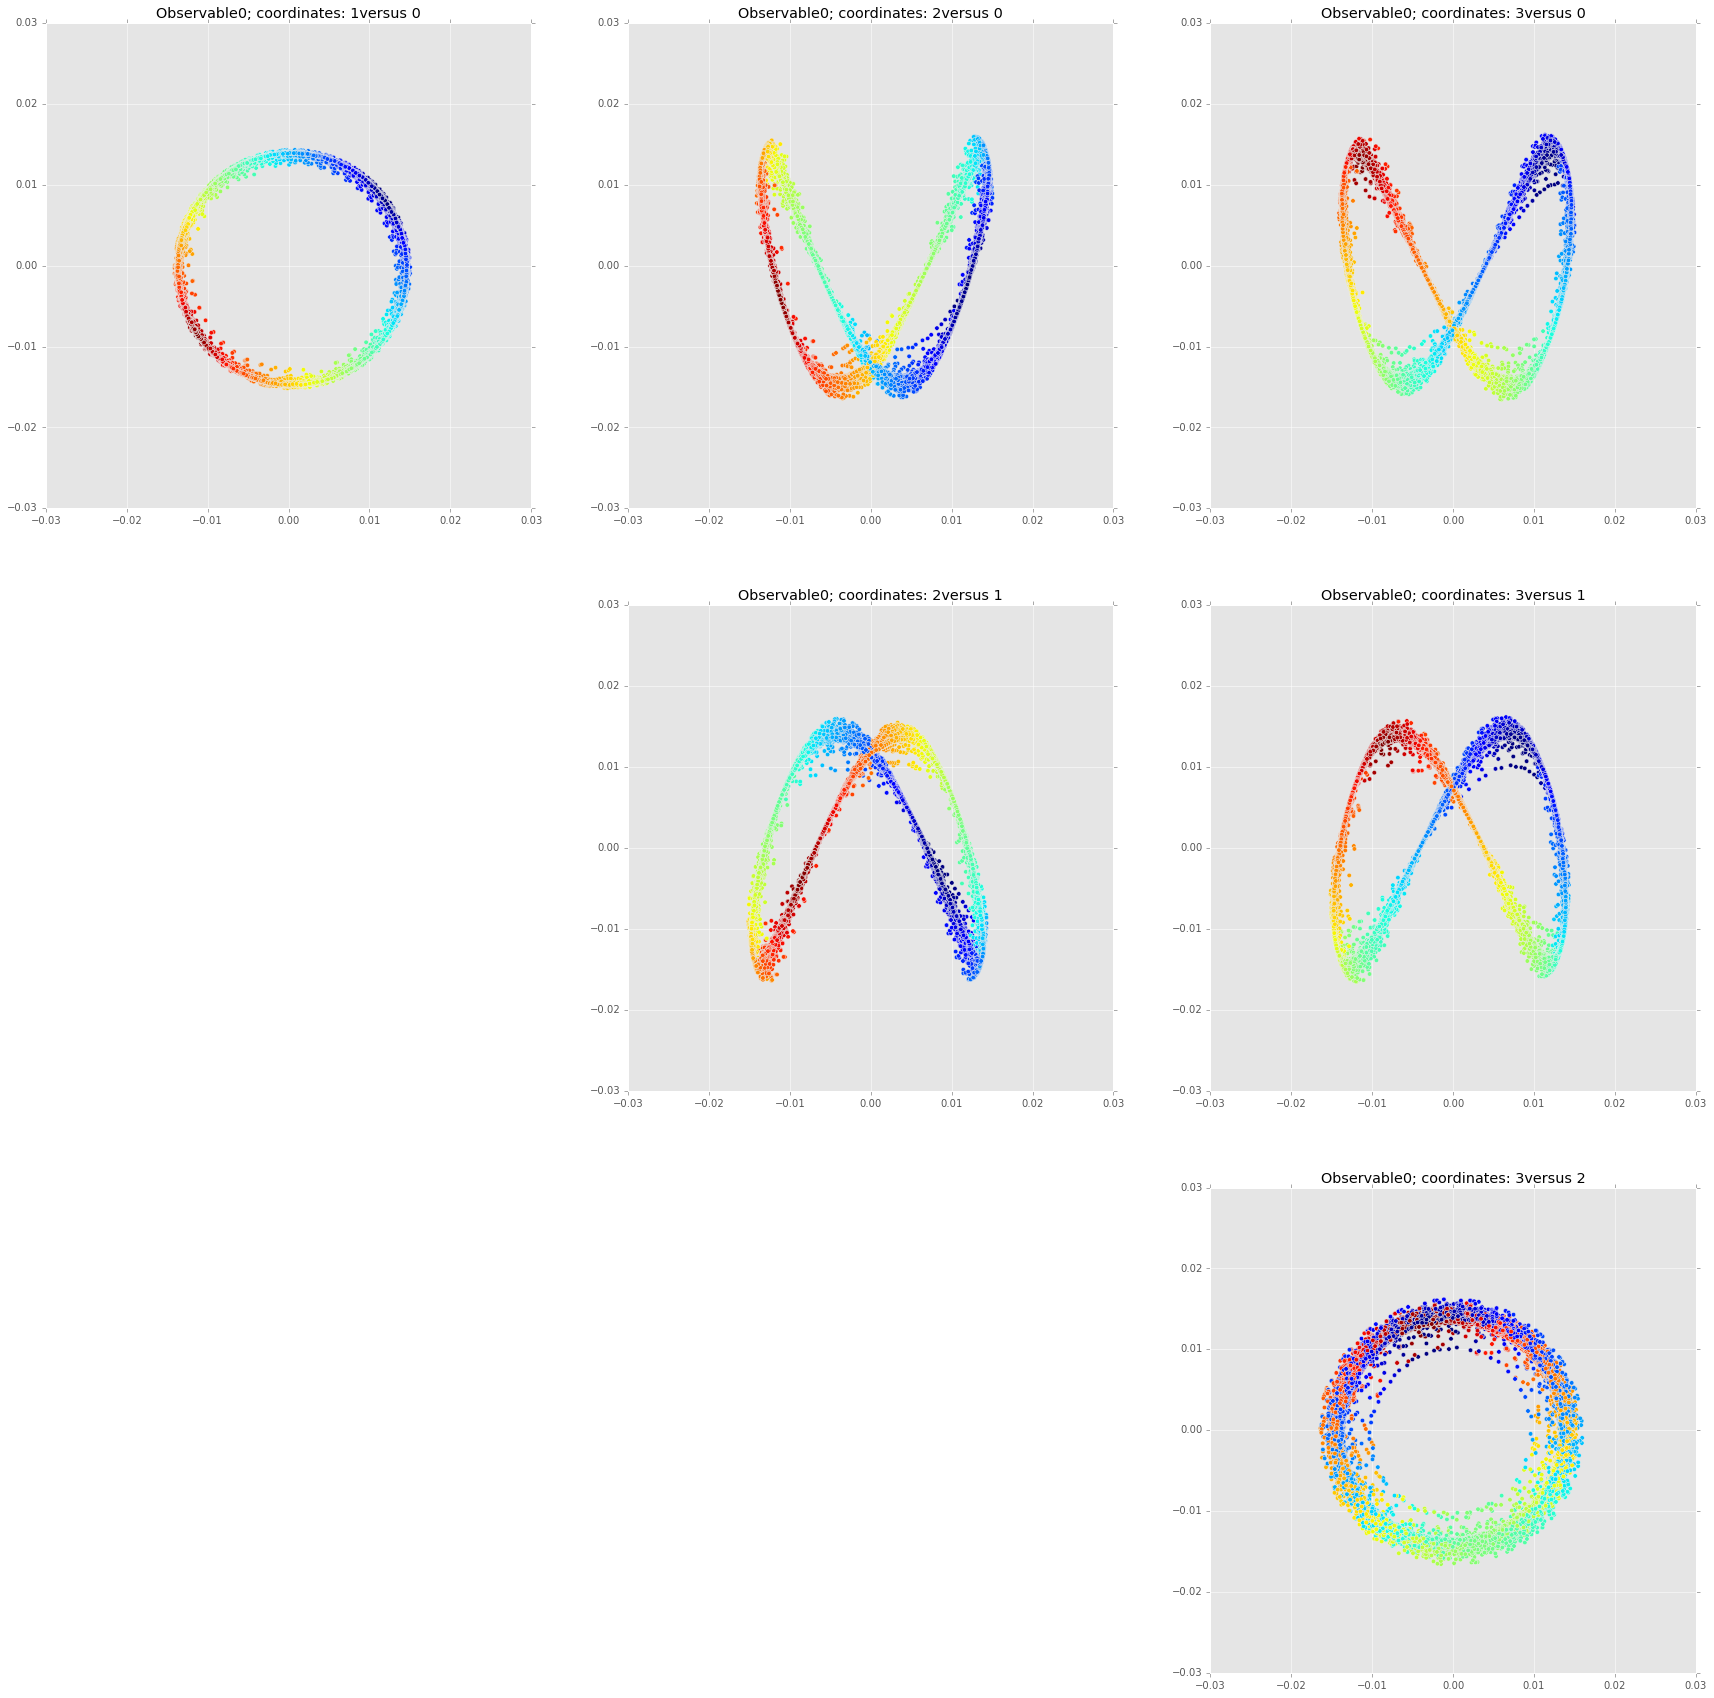

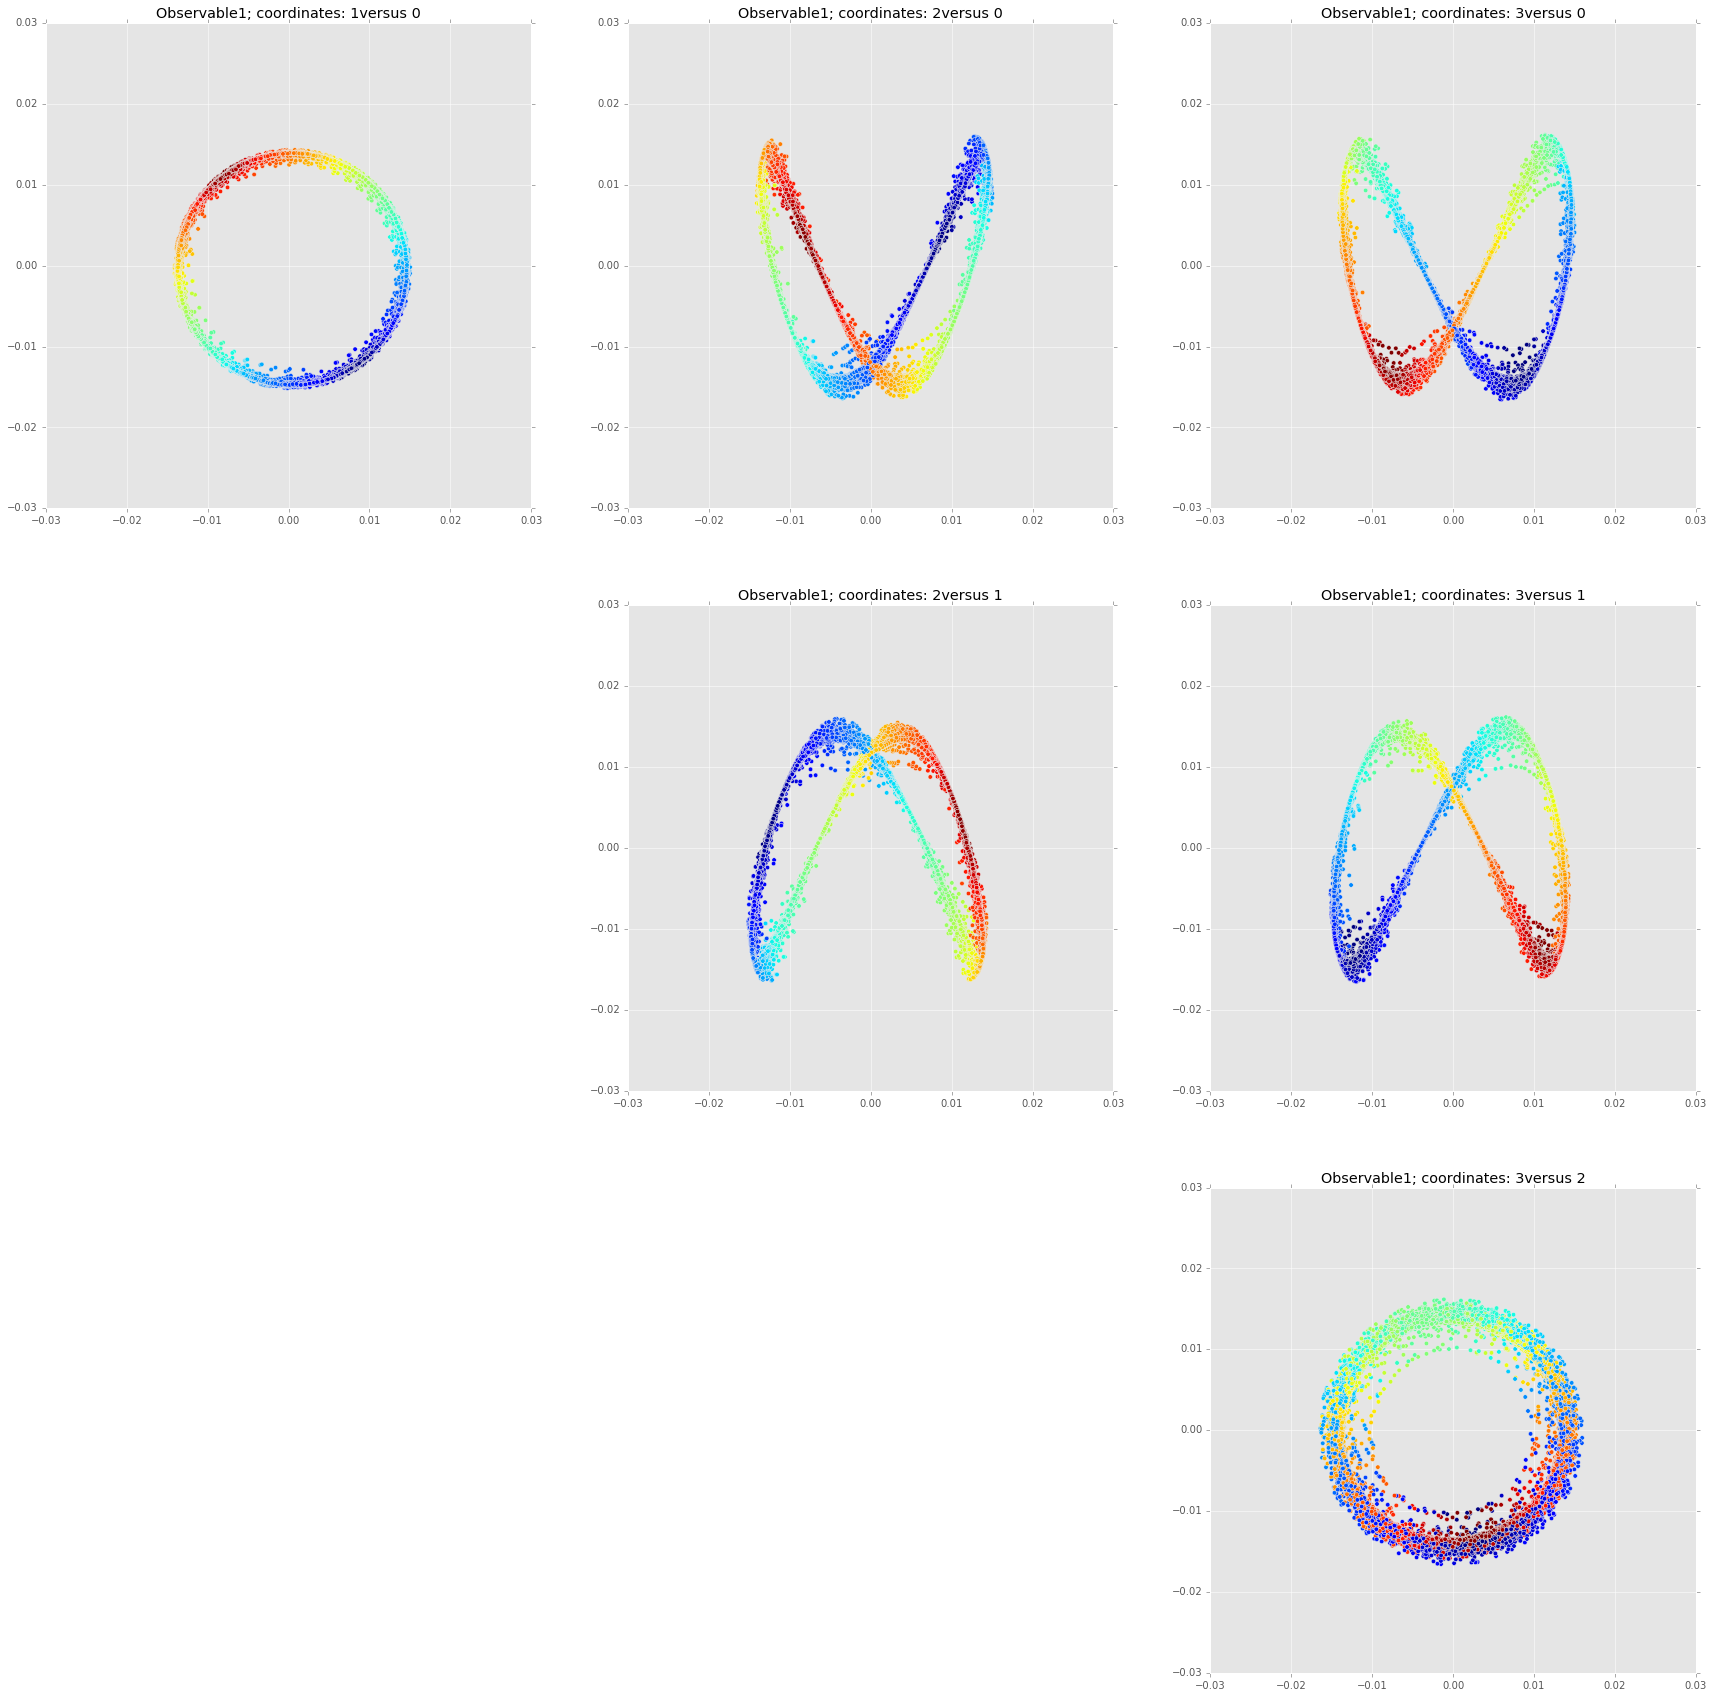

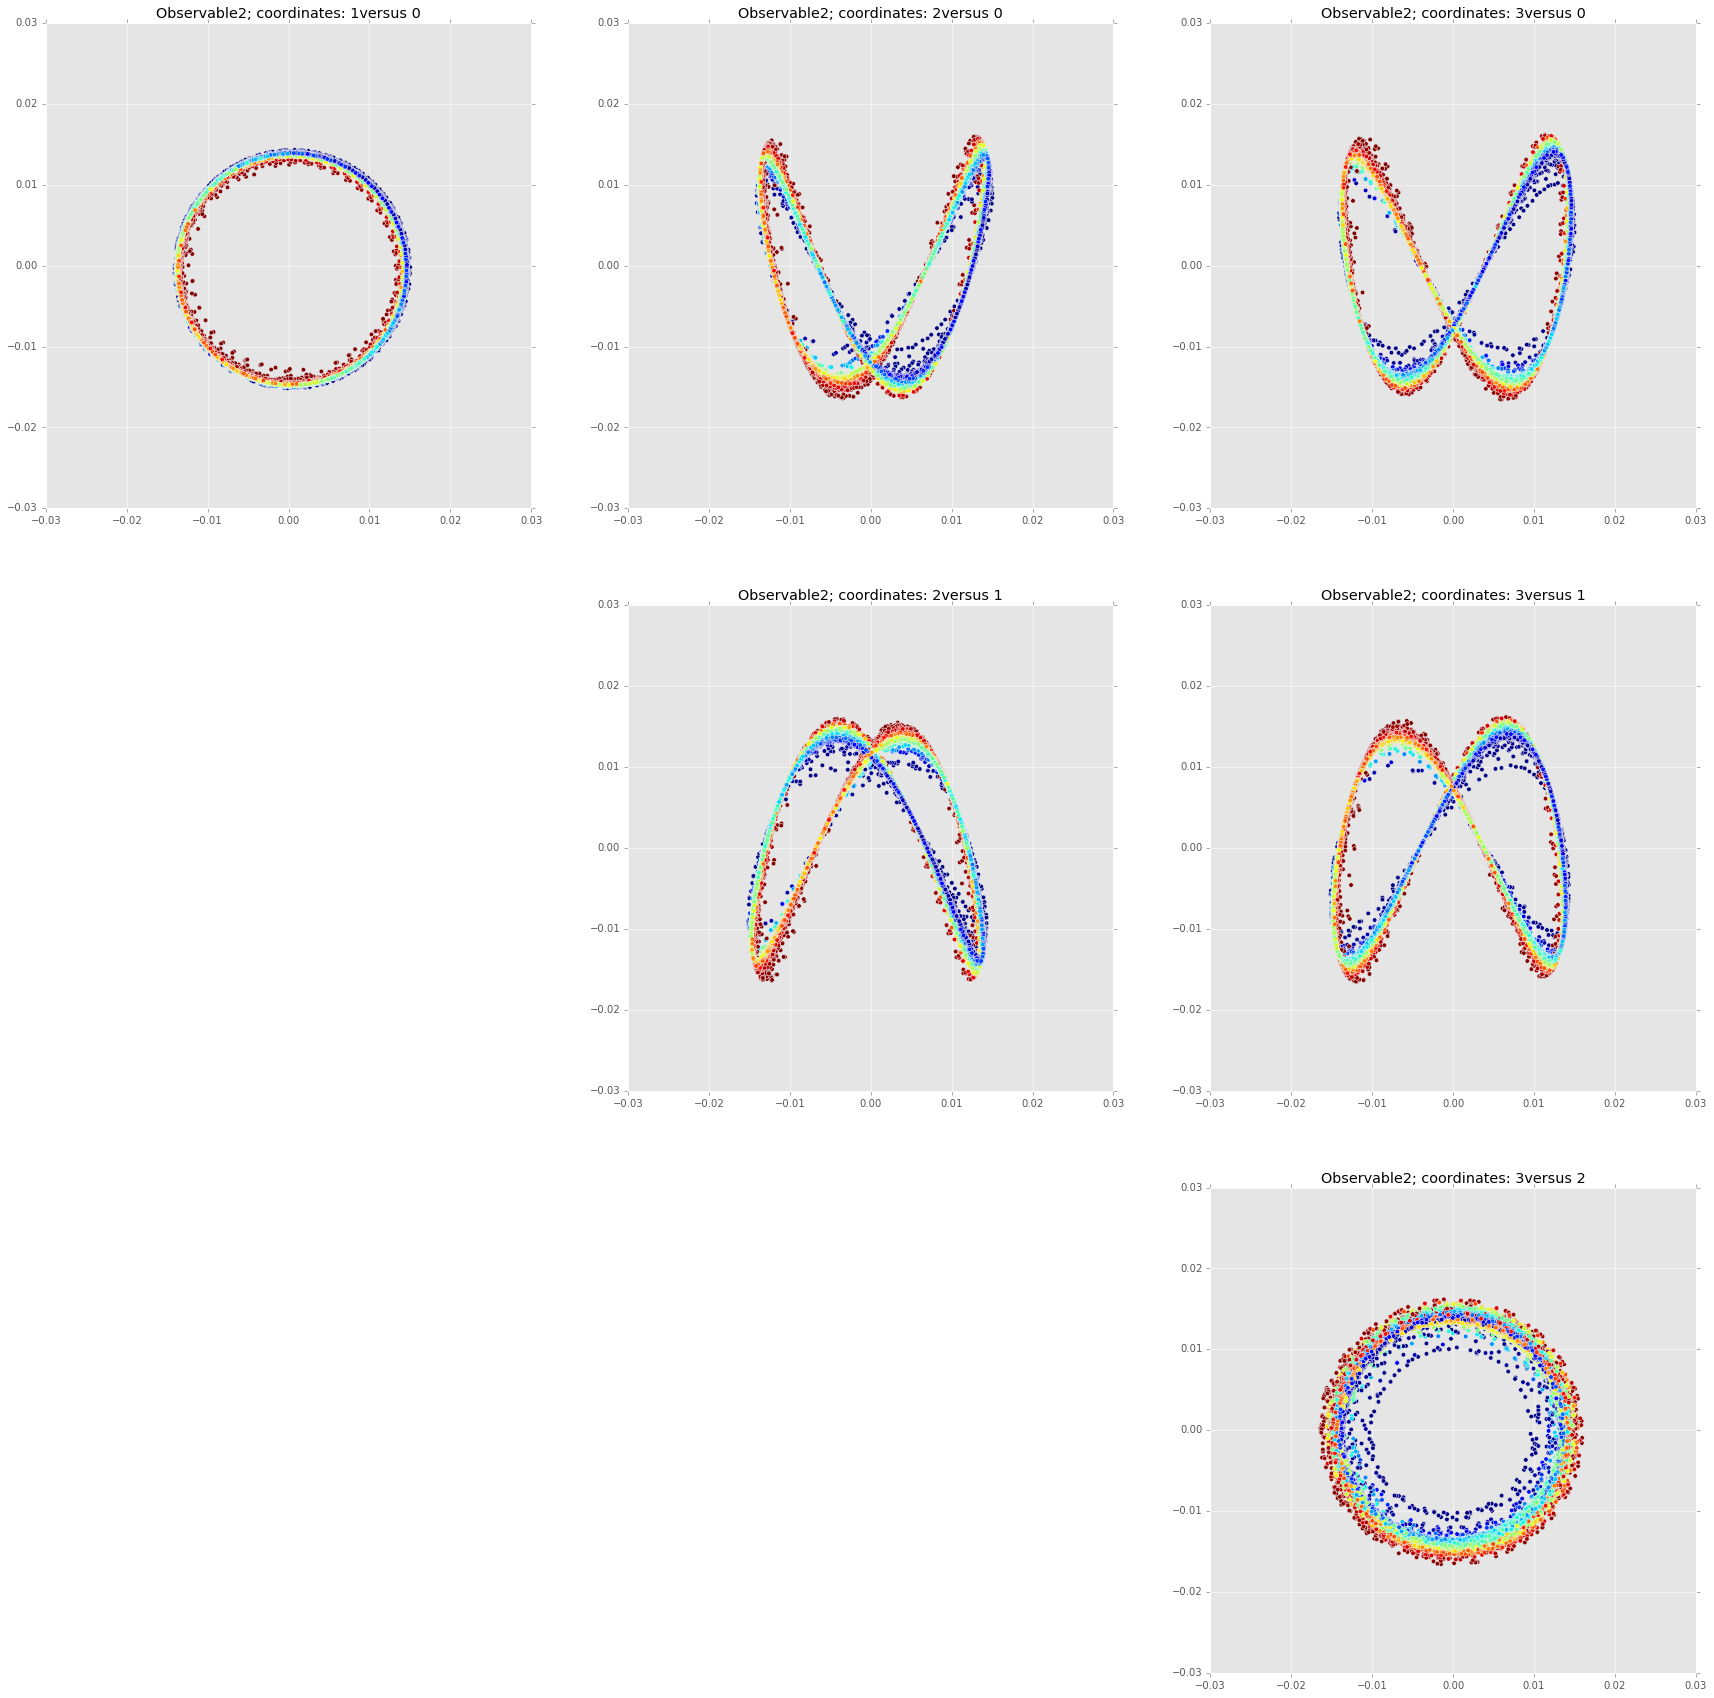

In [35]:
model.plot_diffusion_v_diffusion()

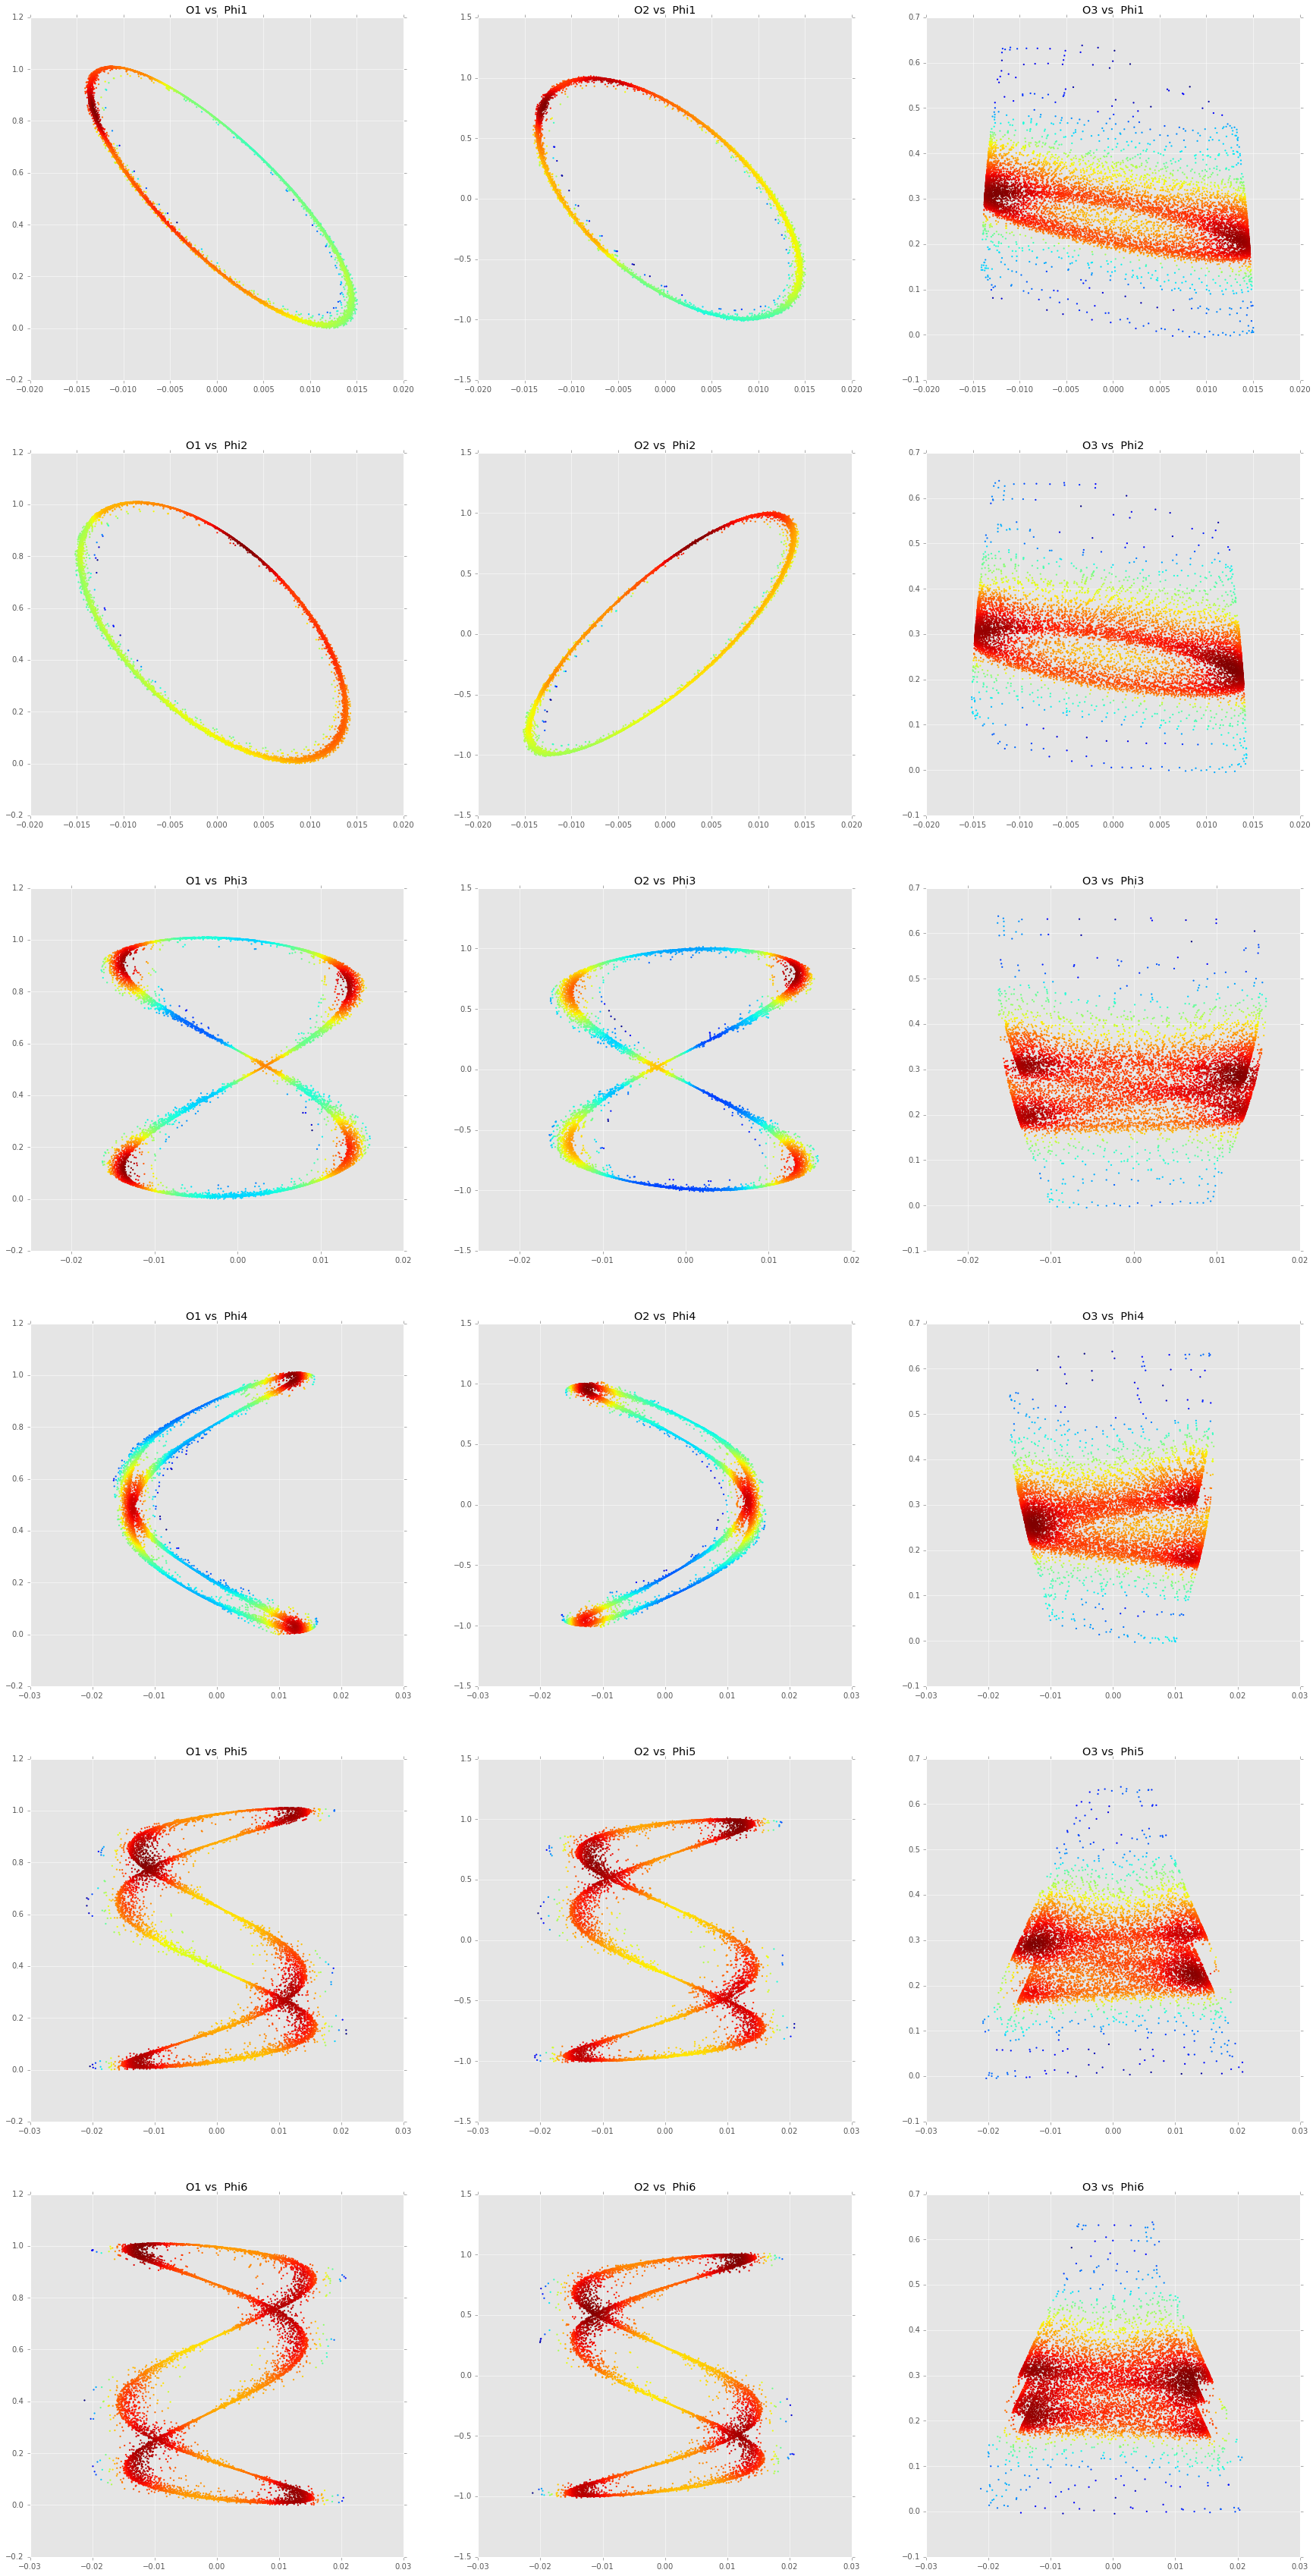

In [36]:
model.plot_obs_v_diffusion()

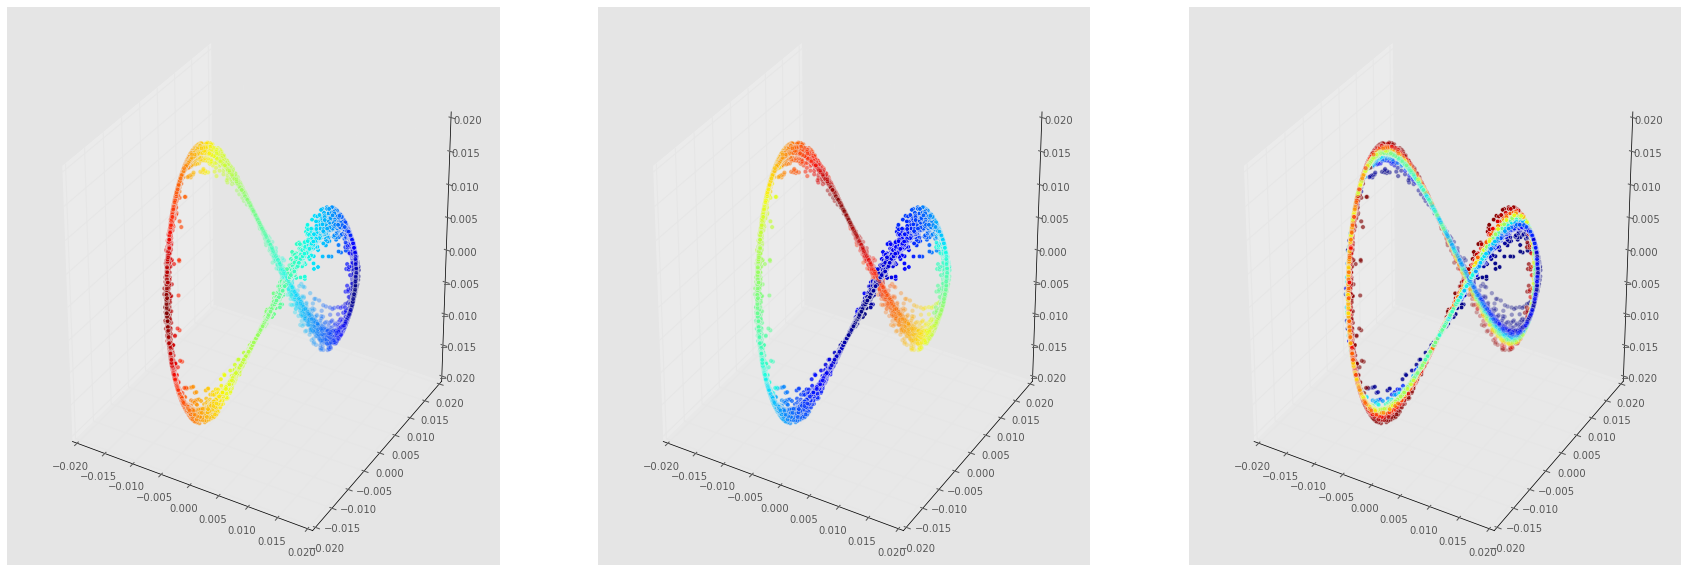

In [37]:
model.plot_diffusion_3d()

In [268]:
builder = build_markov.markov_model_builder(model)

### Note: Here I constrained the covarnace structure to `spherical', meaning the confidence ellipses will appear as circles

In [292]:
builder.build_model(n_clusters=15,n_iter=100,random_state=1,covariance_type='spherical',num_diff_coords=2)

('converged', True)


In [293]:
builder.save()

In [294]:
builder.load()

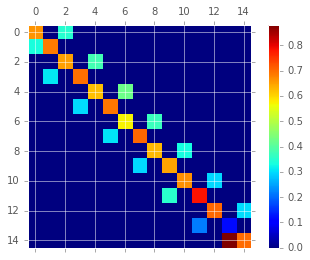

In [295]:
builder.plot_transition_matrix(obs_index = 0)

### Above, the transition matrix indices that the state is moving around in a circle, with some random transition depending on the state.

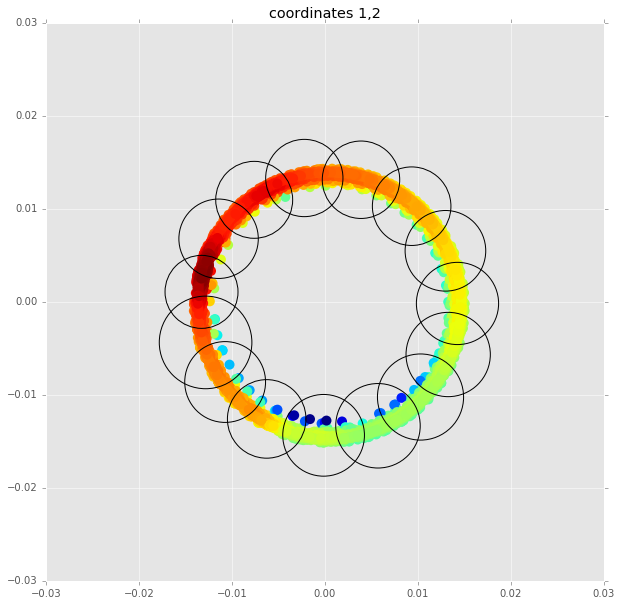

In [296]:
builder.ellipses_plot(indices=[0,1])

In [297]:
# builder.build_model(n_clusters=100,method='agg_clustering')

### The 2 figures below are the observables versus time. (top) is the generated trajectory of the generated Markov model. The observable values were generated by averaging over each cluster. (bottom) actual training trajectory. Generally the trajectory preserves the right values and transitions. The third observable (purple) has greater variance within each cluster than the first two, leading its values to be more averaged-out.

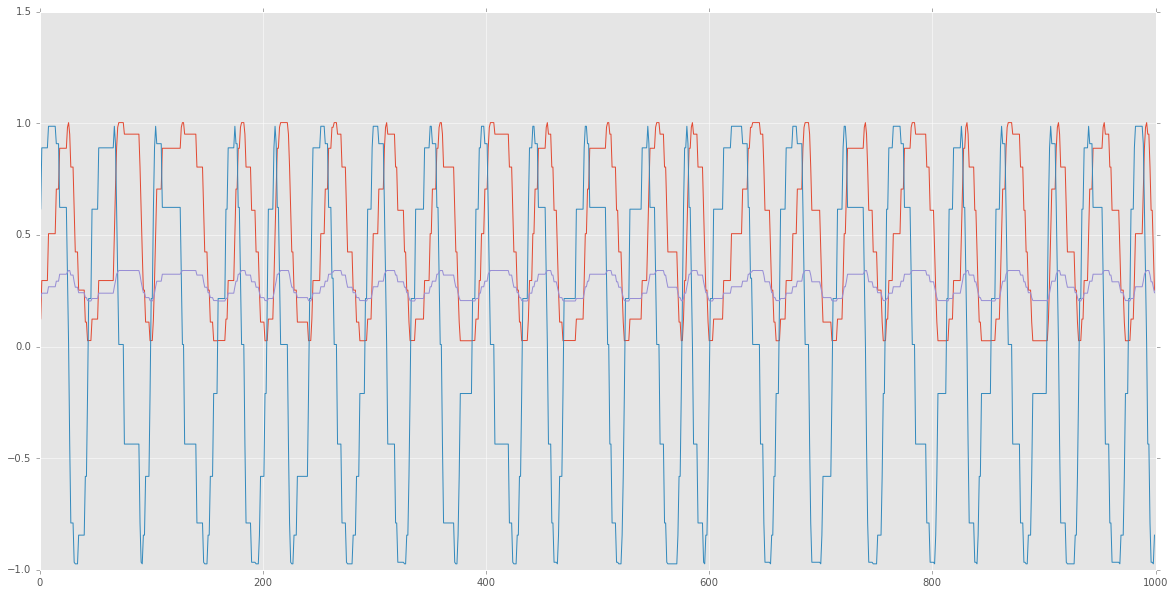

In [298]:
plt.figure(figsize=(20,10))
plt.plot(np.asarray(builder.generate_obs_traj(random_state=0)).T[:1000]);

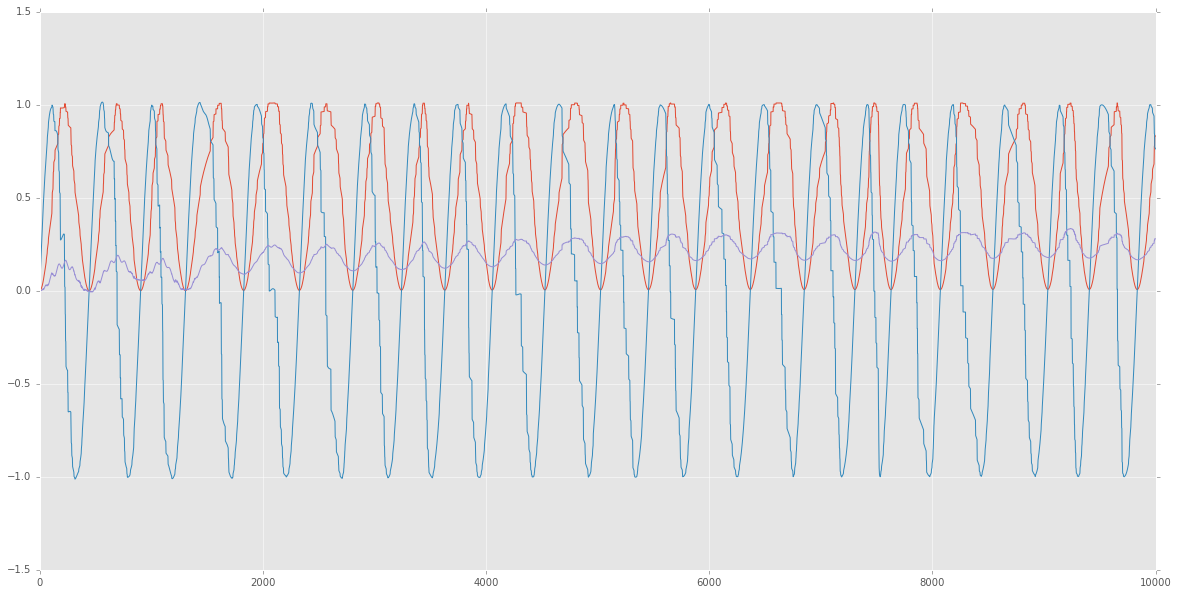

In [291]:
plt.figure(figsize=(20,10))
plt.plot(model.traj_expects.T[:10000]);

## Below:

Let's try estimating the observables in a different way: instead of averaging over a cluster, we will try averaging over the diffusion coordinates and then regress from the diffusion space to the observable space.

In [ ]:
expects = np.asarray([builder.traj_expects[:,i] for i in hand_picked_indices])

In [ ]:
def func_on_data(func, data):
    return np.asarray([[func(data[:,j][clust_indices]) 
                                for clust_indices in builder.clusters]
                                   for j in range(3)])

In [ ]:
clust_obs = func_on_data(np.average,expects)
clust_obs_std = func_on_data(np.std,expects)

In [ ]:
plt.scatter(clust_obs[0],clust_obs[1],)

In [ ]:
plt.plot(clust_obs[0])
plt.plot(clust_obs_std[0])

In [ ]:
cluster_diff = func_on_data(np.average,builder.X)
cluster_diff_std = func_on_data(np.std,builder.X)

In [ ]:
plt.scatter(cluster_diff[0],cluster_diff[1],)

In [ ]:
plt.plot(cluster_diff[0])
plt.plot(cluster_diff_std[0])

In [206]:
from sklearn import linear_model

In [299]:
regr = linear_model.LinearRegression()
regr.fit(builder.X[:,:3],builder.expects_sampled )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Diffusion coordinates of original trajectory regressed into space of observables

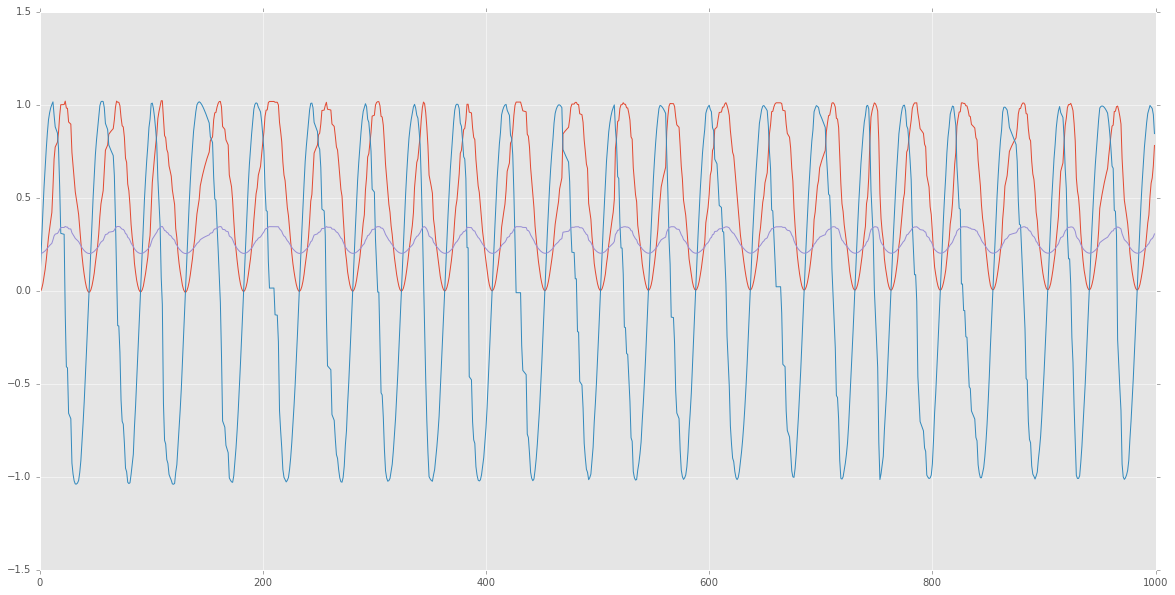

In [305]:
plt.figure(figsize=(20,10))
plt.plot(regr.predict(builder.X[:,:3])[:1000]);